### 1. Import and Install Dependencies

In [643]:
%pip install opencv-python mediapipe sklearn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [644]:
import cv2 
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np

### 2. Kypoints using MP Holistic

In [645]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [646]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    return image, results

In [647]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [648]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1),
                              )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2),)
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2),)
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2),)

In [649]:
mp_holistic.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [650]:
cap = cv2.VideoCapture(1)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(image=frame, model=holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow("OpenCV Feed", image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # close the webcam
    cap.release()

    # close the window
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [651]:
draw_landmarks(image, results)

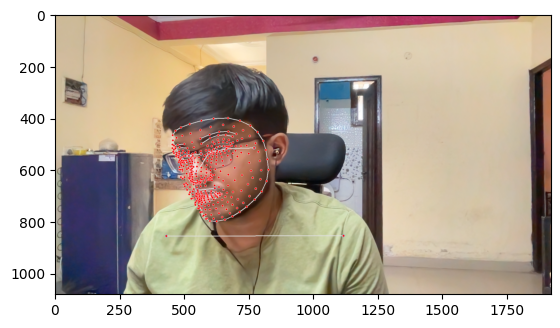

In [652]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### 3. Extract Keypoint Values

In [653]:
results.pose_landmarks

landmark {
  x: 0.28364944
  y: 0.57104343
  z: -0.4387644
  visibility: 0.9997597
}
landmark {
  x: 0.30946395
  y: 0.49582383
  z: -0.4828385
  visibility: 0.9994168
}
landmark {
  x: 0.3261423
  y: 0.48851222
  z: -0.48237053
  visibility: 0.9994741
}
landmark {
  x: 0.34511393
  y: 0.48057047
  z: -0.4823445
  visibility: 0.99945575
}
landmark {
  x: 0.27718553
  y: 0.5068498
  z: -0.4225778
  visibility: 0.99936163
}
landmark {
  x: 0.2695278
  y: 0.50698286
  z: -0.42192188
  visibility: 0.9993541
}
landmark {
  x: 0.2624155
  y: 0.5073507
  z: -0.4221043
  visibility: 0.9993614
}
landmark {
  x: 0.40074643
  y: 0.47822034
  z: -0.48097798
  visibility: 0.99961936
}
landmark {
  x: 0.2938844
  y: 0.50059646
  z: -0.19366962
  visibility: 0.9995794
}
landmark {
  x: 0.32154042
  y: 0.62246335
  z: -0.4221715
  visibility: 0.9997971
}
landmark {
  x: 0.2874756
  y: 0.62960434
  z: -0.33810157
  visibility: 0.99970895
}
landmark {
  x: 0.5803535
  y: 0.79196966
  z: -0.34590763
  vi

In [654]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]) if results.pose_landmarks else np.zeros(33*4)

In [655]:
pose

array([[ 2.83649445e-01,  5.71043432e-01, -4.38764393e-01,
         9.99759674e-01],
       [ 3.09463948e-01,  4.95823830e-01, -4.82838511e-01,
         9.99416828e-01],
       [ 3.26142311e-01,  4.88512218e-01, -4.82370526e-01,
         9.99474108e-01],
       [ 3.45113933e-01,  4.80570465e-01, -4.82344508e-01,
         9.99455750e-01],
       [ 2.77185529e-01,  5.06849825e-01, -4.22577798e-01,
         9.99361634e-01],
       [ 2.69527793e-01,  5.06982863e-01, -4.21921879e-01,
         9.99354124e-01],
       [ 2.62415498e-01,  5.07350683e-01, -4.22104299e-01,
         9.99361396e-01],
       [ 4.00746435e-01,  4.78220344e-01, -4.80977982e-01,
         9.99619365e-01],
       [ 2.93884397e-01,  5.00596464e-01, -1.93669617e-01,
         9.99579430e-01],
       [ 3.21540415e-01,  6.22463346e-01, -4.22171503e-01,
         9.99797106e-01],
       [ 2.87475586e-01,  6.29604340e-01, -3.38101566e-01,
         9.99708951e-01],
       [ 5.80353498e-01,  7.91969657e-01, -3.45907629e-01,
      

In [656]:
pose = pose.flatten()

In [657]:
pose

array([ 2.83649445e-01,  5.71043432e-01, -4.38764393e-01,  9.99759674e-01,
        3.09463948e-01,  4.95823830e-01, -4.82838511e-01,  9.99416828e-01,
        3.26142311e-01,  4.88512218e-01, -4.82370526e-01,  9.99474108e-01,
        3.45113933e-01,  4.80570465e-01, -4.82344508e-01,  9.99455750e-01,
        2.77185529e-01,  5.06849825e-01, -4.22577798e-01,  9.99361634e-01,
        2.69527793e-01,  5.06982863e-01, -4.21921879e-01,  9.99354124e-01,
        2.62415498e-01,  5.07350683e-01, -4.22104299e-01,  9.99361396e-01,
        4.00746435e-01,  4.78220344e-01, -4.80977982e-01,  9.99619365e-01,
        2.93884397e-01,  5.00596464e-01, -1.93669617e-01,  9.99579430e-01,
        3.21540415e-01,  6.22463346e-01, -4.22171503e-01,  9.99797106e-01,
        2.87475586e-01,  6.29604340e-01, -3.38101566e-01,  9.99708951e-01,
        5.80353498e-01,  7.91969657e-01, -3.45907629e-01,  9.98072863e-01,
        2.24170640e-01,  7.93294132e-01, -1.25848621e-01,  9.99424875e-01,
        6.54558480e-01,  

In [658]:
results.left_hand_landmarks

In [659]:
results.right_hand_landmarks

In [660]:
results.face_landmarks

landmark {
  x: 0.29415986
  y: 0.6358627
  z: -0.021178028
}
landmark {
  x: 0.2796655
  y: 0.59612304
  z: -0.036014766
}
landmark {
  x: 0.2914536
  y: 0.60624725
  z: -0.019414224
}
landmark {
  x: 0.27491227
  y: 0.5497446
  z: -0.021735799
}
landmark {
  x: 0.27692455
  y: 0.58237493
  z: -0.038133014
}
landmark {
  x: 0.2773922
  y: 0.56286806
  z: -0.034987465
}
landmark {
  x: 0.28178817
  y: 0.5130954
  z: -0.015808733
}
landmark {
  x: 0.25329942
  y: 0.5219432
  z: 0.042930085
}
landmark {
  x: 0.27925426
  y: 0.47642806
  z: -0.010378425
}
landmark {
  x: 0.27566823
  y: 0.45806685
  z: -0.011205136
}
landmark {
  x: 0.2711597
  y: 0.39329803
  z: -0.002414896
}
landmark {
  x: 0.295559
  y: 0.6423017
  z: -0.020410758
}
landmark {
  x: 0.29776996
  y: 0.6469308
  z: -0.018032914
}
landmark {
  x: 0.30018437
  y: 0.64860547
  z: -0.01493382
}
landmark {
  x: 0.3000147
  y: 0.6524283
  z: -0.01377881
}
landmark {
  x: 0.2998731
  y: 0.65832466
  z: -0.014837484
}
landmark {

In [661]:
pose.shape

(132,)

In [662]:
if results.right_hand_landmarks:
    print("right_hand_landmarks present")
else:
    print("right_hand_landmarks not present")

right_hand_landmarks not present


In [663]:
if results.left_hand_landmarks:
    print("left_hand_landmarks present")
else:
    print("left_hand_landmarks not present")

left_hand_landmarks not present


In [664]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [665]:
lh, rh

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [666]:
lh.shape, rh.shape

((63,), (63,))

In [667]:
# len(results.face_landmarks.landmark) # 468 is landmark property is present

In [668]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [669]:
face

array([ 0.29415986,  0.63586271, -0.02117803, ...,  0.35265726,
        0.46254855, -0.02360208])

In [672]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)   
    return np.concatenate([pose, face, lh, rh])

In [673]:
extract_keypoints(results).shape

(1662,)

### 4. Setup Folders for Collection